<a href="https://colab.research.google.com/github/fabianov2005/formacao_machine_learning_specialist/blob/main/Projeto_Metrica_de_Avaliacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
!pip install webcolors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# def gera_plot():
#   plt.figure(1)
#   plt.plot([0, 1], [0, 1], 'k--')
#   plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#   plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
#   plt.xlabel('False positive rate')
#   plt.ylabel('True positive rate')
#   plt.title('ROC curve')
#   plt.legend(loc='best')
#   plt.show()
#   # Zoom in view of the upper left corner.
#   plt.figure(2)
#   plt.xlim(0, 0.2)
#   plt.ylim(0.8, 1)
#   plt.plot([0, 1], [0, 1], 'k--')
#   plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#   plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
#   plt.xlabel('False positive rate')
#   plt.ylabel('True positive rate')
#   plt.title('ROC curve (zoomed in at top left)')
#   plt.legend(loc='best')
#   plt.show()

In [2]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 10.2 MB/s 


In [3]:
from tensorflow import keras
from keras import datasets, layers, models;
import matplotlib.pyplot as plt;
import tensorflow as tf;
import numpy as np;
import pandas as pd;
import seaborn as sb;

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data();

train_images = train_images.reshape(60000,28,28,1);
test_images = test_images.reshape(10000,28,28,1);

train_images, test_images = train_images/255, test_images/255

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
test_images.shape

(10000, 28, 28, 1)

In [5]:
test_labels.shape

(10000,)

In [6]:
print(tf.__version__)
classes = [0,1,2,3,4,5,6,7,8,9]

2.9.2


In [7]:
convolutional_neural_network=models.Sequential([layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                                                layers.MaxPooling2D((2,2)),
                                                layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                                                layers.MaxPooling2D((2,2)),
                                                layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                                                layers.Flatten(),
                                                layers.Dense(64,activation='relu'),
                                                layers.Dense(10,activation='softmax')])

In [8]:
pt = keras.optimizers.Adam(learning_rate=0.01)
convolutional_neural_network.compile(optimizer=pt, loss="sparse_categorical_crossentropy", 
                                     metrics=["accuracy"])

In [9]:
model = convolutional_neural_network.fit(x = train_images,
                                         y= train_labels,
                                         epochs=5,
                                         validation_data=(test_images, test_labels));


Epoch 1/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1647 - accuracy: 0.9503 - val_loss: 0.1195 - val_accuracy: 0.9693
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1101 - accuracy: 0.9702 - val_loss: 0.0946 - val_accuracy: 0.9739
Epoch 3/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.1041 - accuracy: 0.9733 - val_loss: 0.1079 - val_accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0999 - accuracy: 0.9753 - val_loss: 0.0869 - val_accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0990 - accuracy: 0.9759 - val_loss: 0.0856 - val_accuracy: 0.9810


In [11]:
y_true = test_labels;
y_pred = convolutional_neural_network.predict(test_images);

313/313 [==============================] - 3s 8ms/step


In [12]:
y_true.shape

(10000,)

In [13]:
pred = tf.math.argmax(y_pred, axis = -1)
pred.shape

TensorShape([10000])

In [14]:
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=pred).numpy();

In [15]:
con_mat_norm = np.around(con_mat.astype('float')/con_mat.sum(axis=1)[:np.newaxis], decimals=2)

In [16]:
con_mat_norm

array([[0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.97, 0.  , 0.01, 0.  , 0.  , 0.02],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.96, 0.  , 0.  , 0.01, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.98, 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.97, 0.01],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.98]])

In [17]:
con_mat_df = pd.DataFrame(con_mat_norm, index = classes , columns = classes)

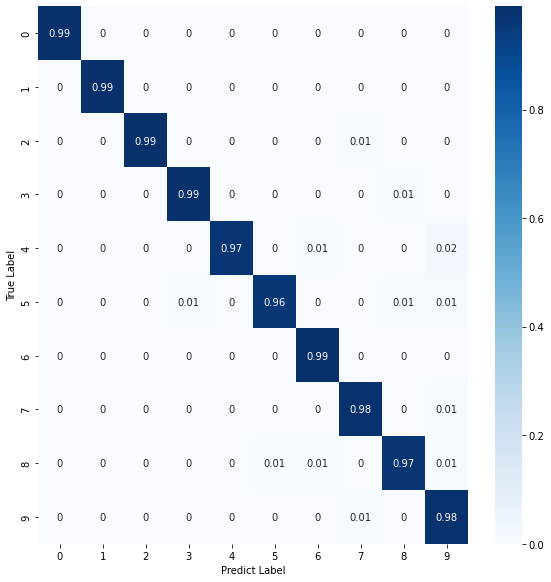

In [18]:
figure = plt.figure(figsize=(8,8))
sb.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predict Label')
plt.show()

In [19]:
FP = con_mat_norm.sum(axis=0) - np.diag(con_mat_norm)
FN = con_mat_norm.sum(axis=1) - np.diag(con_mat_norm) 
VP = np.diag(con_mat_norm) 
VN = con_mat_norm.sum() - (FP + FN + VP)

#Sensibilidade
S = VP/(VP+FN) 
print('Sensibilidade: ', S)

#Especificidade
E = VN/(VN+FP) 
print('Especificidade: ', E)

#Precisão
P = VP/(VP+FP) 
print('Precisão: ', P)

#F1 Score
F1 = 2 * (P * S)/(P + S) 
print('F1 Score: ', F1)

#Acurária
ACC = (VP+VN)/(VP+FP+FN+VN) 
print('Acurária: ', ACC)

Sensibilidade:  [1.         1.         0.99       0.99       0.97       0.96969697
 1.         0.98989899 0.97       0.98989899]
Especificidade:  [1.         1.         1.         0.99888143 1.         0.99888268
 0.99776536 0.99776536 0.99776286 0.99441341]
Precisão:  [1.         1.         1.         0.99       1.         0.98969072
 0.98019802 0.98       0.97979798 0.95145631]
F1 Score:  [1.         1.         0.99497487 0.99       0.98477157 0.97959184
 0.99       0.98492462 0.97487437 0.97029703]
Acurária:  [1.         1.         0.99899396 0.99798793 0.99698189 0.99597586
 0.99798793 0.99698189 0.99496982 0.99396378]


In [124]:
cores = ['black','blue','yellow','green','indigo','brown','red','cyan','gray','orange']

{0: array([0.        , 0.11485588, 0.22239468, 0.33747228, 0.44467849,
       0.54168514, 0.64722838, 0.7594235 , 0.87372506, 0.99855876,
       1.        ]), 1: array([0.        , 0.11697688, 0.22628314, 0.34326001, 0.45256627,
       0.55115623, 0.65843204, 0.77258883, 0.88843768, 0.8891145 ,
       1.        ]), 2: array([0.        , 0.11563336, 0.22368421, 0.33887154, 0.44681088,
       0.54438002, 0.65042373, 0.7632694 , 0.764719  , 0.89016503,
       1.        ]), 3: array([0.        , 0.11523915, 0.22269188, 0.33826474, 0.4461624 ,
       0.54304783, 0.64894327, 0.65061179, 0.7650723 , 0.89032258,
       1.        ]), 4: array([0.        , 0.11266356, 0.22022621, 0.33521845, 0.44211577,
       0.53914393, 0.5394766 , 0.65169661, 0.76591262, 0.89077401,
       1.        ]), 5: array([0.        , 0.11231884, 0.21826965, 0.33234519, 0.4384058 ,
       0.44027229, 0.54479578, 0.65502855, 0.76822574, 0.89185332,
       1.        ]), 6: array([0.        , 0.11468702, 0.22174298, 0.336

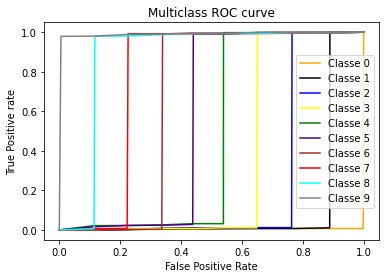

<Figure size 432x288 with 0 Axes>

In [125]:
from sklearn.metrics import roc_curve, roc_auc_score

n_class = 10
fpr = {}
tpr = {}
auc = {}
thresh ={}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred[::1], pos_label=i)

print(fpr)   
    
# plotting    
for i in range(n_class):
  color = list(np.random.choice(range(256), size=3))  
  plt.plot(fpr[i], tpr[i], linestyle='-',color=cores[i-1], label='Classe {}'.format(i))

plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()
plt.savefig('Multiclass ROC',dpi=600); 